In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/Users/maureenkeenan/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/maureenkeenan/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/maureenkeenan/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/maureenkeenan/anaconda3/lib/py

In [ ]:
# Define functions

In [2]:
def build_model(my_learning_rate):
    # Simple models are sequential, and can contain one or more layers
    model = tf.keras.models.Sequential()
    
    # Simple linear regression using a single node and single layer
    model.add(tf.keras.layers.Dense(units=1,
                                   input_shape=(1,)))
    
    # TensorFlow code needs to be compiled from model and given an optimizer to work
    model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                  loss = "mean_squared_error",
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])
    
    return model

In [3]:
def train_model(model, feature, label, epochs, batch_size):
    # Fit the model
    history = model.fit(x=feature,
                        y=label,
                        batch_size=None,
                        epochs=epochs)
    
    # Gather the trained model's weight and bias
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]
    
    # List of epochs is stored separately 
    epochs = history.epoch
    
    # Gather the history of each epoch
    hist = pd.DataFrame(history.history)
    
    # Specificaly gather the model's root mean square for each epoch
    rmse = hist["root_mean_squared_error"]
    
    return trained_weight, trained_bias, epochs, rmse


In [4]:
def plot_the_model(trained_weight, trained_bias, feature, label):
    # Plot a simple linear regression
    
    # Label the axes
    plt.xlabel("feature")
    plt.ylabel("label")
    
    # Plot the feature values vs label values
    plt.scatter(feature, label)
    
    # Plot the fit as a red line
    x0 = 0
    y0 = trained_bias
    x1 = my_feature[-1]
    y1 = trained_bias + (trained_weight * x1)
    plt.plot([x0,x1],[y0,y1], c = 'r')
    
    # Show the plot
    plt.show()

In [5]:
def plot_the_loss_curve(epochs,rmse):
    
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")
    
    plt.plot(epochs,rmse, label="Loss")
    plt.legend()
    plt.ylim([rmse.min()*0.97, rmse.max()])
    plt.show()

In [6]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

Train on 12 samples
Epoch 1/200
12/12 [==============================] - 0s 20ms/sample - loss: 1145.3711 - root_mean_squared_error: 33.8433
Epoch 2/200
12/12 [==============================] - 0s 741us/sample - loss: 1127.7802 - root_mean_squared_error: 33.5824
Epoch 3/200
12/12 [==============================] - 0s 775us/sample - loss: 1115.1501 - root_mean_squared_error: 33.3939
Epoch 4/200
12/12 [==============================] - 0s 1ms/sample - loss: 1104.6528 - root_mean_squared_error: 33.2363
Epoch 5/200
12/12 [==============================] - 0s 737us/sample - loss: 1095.3915 - root_mean_squared_error: 33.0967
Epoch 6/200
12/12 [==============================] - 0s 792us/sample - loss: 1086.9501 - root_mean_squared_error: 32.9689
Epoch 7/200
12/12 [==============================] - 0s 720us/sample - loss: 1079.0972 - root_mean_squared_error: 32.8496
Epoch 8/200
12/12 [==============================] - 0s 857us/sample - loss: 1071.6890 - root_mean_squared_error: 32.7367
Epoch 9

Epoch 69/200
12/12 [==============================] - 0s 868us/sample - loss: 761.7183 - root_mean_squared_error: 27.5992
Epoch 70/200
12/12 [==============================] - 0s 766us/sample - loss: 757.2889 - root_mean_squared_error: 27.5189
Epoch 71/200
12/12 [==============================] - 0s 622us/sample - loss: 752.8727 - root_mean_squared_error: 27.4385
Epoch 72/200
12/12 [==============================] - 0s 652us/sample - loss: 748.4700 - root_mean_squared_error: 27.3582
Epoch 73/200
12/12 [==============================] - 0s 564us/sample - loss: 744.0809 - root_mean_squared_error: 27.2778
Epoch 74/200
12/12 [==============================] - 0s 653us/sample - loss: 739.7051 - root_mean_squared_error: 27.1975
Epoch 75/200
12/12 [==============================] - 0s 581us/sample - loss: 735.3426 - root_mean_squared_error: 27.1172
Epoch 76/200
12/12 [==============================] - 0s 648us/sample - loss: 730.9935 - root_mean_squared_error: 27.0369
Epoch 77/200
12/12 [====

Epoch 136/200
12/12 [==============================] - 0s 969us/sample - loss: 494.3217 - root_mean_squared_error: 22.2333
Epoch 137/200
12/12 [==============================] - 0s 599us/sample - loss: 490.7802 - root_mean_squared_error: 22.1536
Epoch 138/200
12/12 [==============================] - 0s 671us/sample - loss: 487.2518 - root_mean_squared_error: 22.0738
Epoch 139/200
12/12 [==============================] - 0s 815us/sample - loss: 483.7366 - root_mean_squared_error: 21.9940
Epoch 140/200
12/12 [==============================] - 0s 784us/sample - loss: 480.2346 - root_mean_squared_error: 21.9143
Epoch 141/200
12/12 [==============================] - 0s 749us/sample - loss: 476.7458 - root_mean_squared_error: 21.8345
Epoch 142/200
12/12 [==============================] - 0s 608us/sample - loss: 473.2701 - root_mean_squared_error: 21.7548
Epoch 143/200
12/12 [==============================] - 0s 783us/sample - loss: 469.8076 - root_mean_squared_error: 21.6750
Epoch 144/200
12

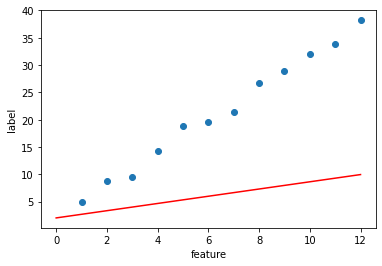

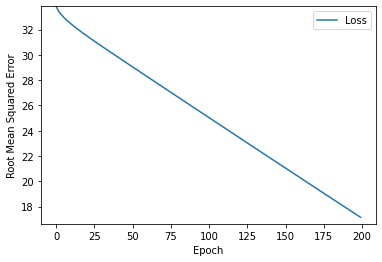

In [11]:
learning_rate=0.01
epochs=200
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)